In [ ]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np
  
# import file with data
data = pd.read_csv("Group16_ClassificationData.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


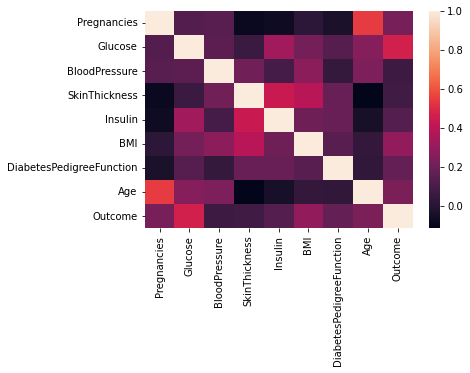

In [ ]:
# plotting correlation heatmap
dataplot=sb.heatmap(data.corr())
  
# displaying heatmap
mp.show()

In [ ]:
#Split data for training and testing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

target = data["Outcome"]
refinedData = data.drop(["Outcome"], axis=1)

sc_X = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(refinedData, target, test_size=0.2, random_state=42)
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB #Import Naive Bayes Module

model = GaussianNB()
model.fit(x_train, y_train) #Train model

GaussianNB()

In [ ]:
#Get accuracy information for new data
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


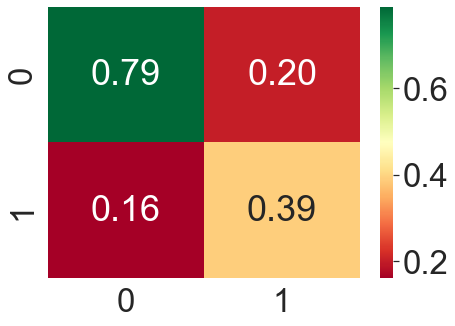

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# plotting correlation heatmap
plt.figure(figsize = (7,5))
sb.set(font_scale=3.0)
dataplot=sb.heatmap(confusion_matrix(y_test, y_pred)/100,annot=True, fmt='.2f', cmap='RdYlGn')

In [ ]:
#Get accuracy information for training data. This helps identify potential over-fitting
y_pred = model.predict(x_train)

print("Accuracy:", accuracy_score(y_train, y_pred))

Accuracy: 0.752442996742671
